##Análise de Sentimentos
A análise de sentimento visa determinar a opinião ou sentimento das pessoas eem relçao a um produto, pessoa, evento, ou qualquer outro objeto de interesse. Por exemplo, um palestrante ou escritor em relação a um documento, interação ou evento. O sentimento é principalmente categorizado em categorias positivas, negativas e neutras. Por meio da análise de sentimento, podemos prever, por exemplo, a opinião e a atitude de um cliente sobre um produto com base em uma resenha que ele escreveu. Essa técnica é amplamente aplicada a coisas como revisões, pesquisas, documentos e muito mais.

##Base de Dados IMDB
O conjunto de dados de classificação de sentimento do IMDB (https://www.imdb.com/) consiste em 50000 resenhas de filmes de usuários do IMDB que são rotuladas como positivas (1) ou negativas (0). As 50000 resenhas são divididas em 25000 para treinamento e 25000 para teste. O conjunto de dados foi criado por pesquisadores da Universidade de Stanford e publicado em um artigo de 2011, onde alcançou 88.89% de precisão. 

In [2]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
import numpy as np

# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below
# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)


print("Categories:", np.unique(labels))
print("Number of unique words:", len(np.unique(np.hstack(data))))

length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

<class 'list'>
Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


Você pode ver acima que o conjunto de dados é classificado em duas categorias, 0 ou 1, que representa o sentimento da avaliação do filme, negativo e positivo respectivamente. Todo o conjunto de dados contém 9.998 palavras únicas e o comprimento médio da revisão é de 234 palavras, com um desvio padrão de 173 palavras. 

##Decodificação da Avaliação
Abaixo, vamos decodificar o rótulo no formato *One-Hot Code*.  


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(labels.reshape(-1, 1))
print(y[0])


[0. 1.]


##Preparação dos Dados

Nos códigos abaixo iremos realizar a separação dos dados em treinamento e teste utilizando a função `train_test_split` do sklearn. 

In [5]:
sentences_train, sentences_test, y_train, y_test  = train_test_split(data, y, test_size=0.3, random_state=42, stratify=y)
print(sentences_train[:2], y_train[:2])

[list([1, 193, 4, 1003, 1544, 592, 1648, 2, 7, 4, 4997, 1493, 11, 49, 5867, 39, 2, 2, 668, 1879, 2, 5203, 6485, 5, 9358, 11, 49, 2509, 2, 34, 167, 4748, 25, 28, 4, 132, 7521, 2493, 42, 4, 693, 3908, 7, 128, 573, 17, 4, 250, 39, 2, 11, 4, 2997, 2, 15, 132, 39, 2, 63, 47, 164, 8, 81, 19, 14, 422, 14, 127, 193, 273, 11, 3829, 75, 215, 202, 12, 15, 42, 2, 17, 442, 82, 5414, 8, 9, 40, 35, 445, 310, 7, 3960, 7375, 256, 133, 34, 524, 2, 19, 15, 1081, 2, 1826, 63, 91, 7, 178, 86, 877, 2, 19, 11, 2, 50, 26, 1942, 491, 56, 665, 7, 41, 4488, 125, 370, 1364, 636, 41, 1642, 242, 137, 149, 142, 4009, 190, 59, 9, 2, 11, 41, 1317, 2493, 136, 59, 7565, 35, 436, 1272, 7, 668, 5197, 2, 2, 5, 2269, 6, 543, 446, 42, 142, 43, 1005, 2, 852, 2, 134, 5867, 63, 2453, 1482, 11, 4, 1431, 523, 7, 481, 1307, 21, 466, 49, 1774, 270, 1592, 2057, 12, 1160, 4, 172, 2723, 841, 7, 18, 463, 4, 55, 1967, 49, 539, 81, 63, 385, 46, 187, 4, 172, 58, 5, 63, 82, 2561, 6, 668, 1272, 33, 86, 7334, 4, 1682, 7, 32, 134, 4475, 5186,

## Sequence Padding

Um problema que temos é que cada sequência de texto tem na maioria dos casos diferentes comprimentos de palavras. Para corrigir isso, vamos usar `pad_sequence()` que simplesmente preenche a sequência de palavras com zeros. O número máximo 250 foi escolhido por uma aproximação da média de palavras na avaliação que é 234. 

In [6]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(sentences_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(sentences_test, padding='post', maxlen=maxlen)
print(X_train[100])


[  13  124   12 4283   30    2 3647    7 3384   21   48   40   72   25
  119  108   15   26  324 1293    5   28  212  883    5   35  221  114
   25   80  119   12   12    9 1061   19   87  105    5 1022    5    2
   26  199 1490   38  259   70 6157   33  142 2276 1324  347   25   28
    8  202   12    6  353   13  296   12   23  248   31  251   34    2
    5  447   12   15   13   69    8  140   46    5 1406   12  180   63
  562   49   58    5   13  100  106   12 2905   61  336    4  632   13
  119   25]


##Construindo a Rede Neural

Agora podemos construir uma rede neural simples. Começaremos definindo o tipo de modelo que queremos construir. Existem dois tipos de modelos disponíveis no Keras: o modelo sequencial e a classe do modelo usado na API funcional.

Começamos adicionando a primeira camada padrão ao lidar com Texto e CNNs: a camada de Embeddings. Nesse exercício vamos usar um Embedding de tamanho 300. Depois, camadas de Convolução e MaxPooling são adicionadas e por fim, camadas de classificação Densas, sendo que a última camada utiliza a função de classificaçao Softmax.
Por último, vemos um resumo do modelo que acabamos de construir. OBS: Lembre-se de mudar seu ambiente de execução para GPU.

In [7]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import losses

embedding_dim = 300
num_classes = y_train.shape[1]


model = Sequential()
vocab_size = X_train.shape[0] + 1 

model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

#mostra o modelo construído
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          10500300  
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 32)            48032     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 10,548,684
Trainable params: 10,548,684
Non-trainable params: 0
_________________________________________________________________


##Compilação do Modelo

Nessa parte do código, definimos os algoritmos de otimização, a função de perda e a métrica que será utilizada para avaliação do modelo. 

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##Configuração da Avaliação
Reservaremos uma parte de nossos dados de treinamento para validação da precisão do modelo durante o treinamento. Um conjunto de validação nos permite monitorar o progresso de nosso modelo em dados não vistos anteriormente à medida que ele passa por épocas durante o treinamento.
As etapas de validação nos ajudam a ajustar os parâmetros de treinamento da função `model.fit` para evitar overfitting e underfitting de dados.


In [9]:
# Input for Validation
X_val = X_train[:5000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:5000]
partial_y_train = y_train[10000:]

##Treinamento do Modelo

In [10]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=512)


### Resultados

In [11]:
from sklearn import metrics

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

y_true  = np.argmax(y_test, axis=1)
preds = (model.predict(X_test) > 0.5).astype("int32")[:, [1]]

print(metrics.classification_report(y_true,preds))


Training Accuracy: 0.9580
Testing Accuracy:  0.8570
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7500
           1       0.86      0.86      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



##Visualizando os Resultados

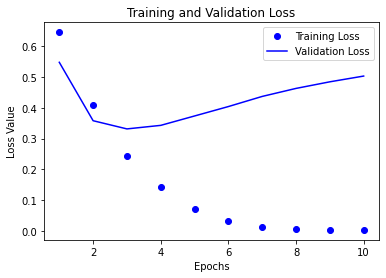

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
history_dict.keys()

# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()



## Adicionando embeddings pré-treinados
É possível usarmos embeddings pré-treinados. A escolha é sempre relativa ao seu problema. Por exemplo, se você precisa resolver um problema de classificação de texto de cunho geral, pode pegar um Embeddings pré-treinado do Google, com milhões de textos. Porém, se quiser resolver um problema de classificação de sentimentos de review de livros, pode ser útil utilizar um embeddings mais próximo do seu problema, como por exemplo, um embeddings pré-treinado com informações e review de livros da Amazon. Nessa atividade, vamos utilizar o Embedding de notícias do Google.
### Word2Vec

In [13]:
!wget https://gist.githubusercontent.com/bastings/4d1c346c68969b95f2c34cfbc00ba0a0/raw/76b4fefc9ef635a79d0d8002522543bc53ca2683/googlenews.word2vec.300d.txt

--2021-09-16 00:12:11--  https://gist.githubusercontent.com/bastings/4d1c346c68969b95f2c34cfbc00ba0a0/raw/76b4fefc9ef635a79d0d8002522543bc53ca2683/googlenews.word2vec.300d.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66209703 (63M) [text/plain]
Saving to: ‘googlenews.word2vec.300d.txt’

googlenews.word2vec 100%[===================>]  63.14M   161MB/s    in 0.4s    

2021-09-16 00:12:16 (161 MB/s) - ‘googlenews.word2vec.300d.txt’ saved [66209703/66209703]



### GLove

In [14]:
!wget https://gist.githubusercontent.com/bastings/b094de2813da58056a05e8e7950d4ad1/raw/3fbd3976199c2b88de2ae62afc0ecc6f15e6f7ce/glove.840B.300d.sst.txt

--2021-09-16 00:12:17--  https://gist.githubusercontent.com/bastings/b094de2813da58056a05e8e7950d4ad1/raw/3fbd3976199c2b88de2ae62afc0ecc6f15e6f7ce/glove.840B.300d.sst.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53933315 (51M) [text/plain]
Saving to: ‘glove.840B.300d.sst.txt’

glove.840B.300d.sst 100%[===================>]  51.43M   134MB/s    in 0.4s    

2021-09-16 00:12:20 (134 MB/s) - ‘glove.840B.300d.sst.txt’ saved [53933315/53933315]



In [15]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
    


#Exercícios

1. Realize a análise de sentimentos com os Embeddings pré-treinados Word2Vec e Glove, utilizando a rede neural criada em cima. Na tabela abaixo, troque o X pelos resultados da acurácia, do precision, do recall e F1.

\begin{array}{|c|c|c|c|c|}\hline 
  Embedding & Precisão & Recall & F1 & Acurácia\\  \hline 
Word2Vec & 0,88 & 0,88 & 0,88 & 0,88  \\ \hline
Glove  & 0,85 & 0,85 & 0,85 & 0,85  \\ \hline 
\end{array}

In [16]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from sklearn import metrics

#recupera palavras a partir dos indices da base imdb
word_index = imdb.get_word_index()
index_word = {k:v for k,v in word_index.items()}

#Cria a matriz de Embeddings
embedding_matrix = create_embedding_matrix('glove.840B.300d.sst.txt',
                      index_word, embedding_dim)

embedding_dim = 300
num_classes = y_train.shape[1]

#Cria Rede Neural
modelGlove = Sequential()
vocab_size = len(index_word) + 1 

modelGlove.add(layers.Embedding(input_dim=vocab_size, 
                           weights=[embedding_matrix],
                           output_dim=embedding_dim, 
                           input_length=maxlen))
modelGlove.add(layers.Conv1D(32, 5, activation='relu'))
modelGlove.add(layers.GlobalMaxPooling1D())
modelGlove.add(layers.Dense(10, activation='relu'))
modelGlove.add(layers.Dense(num_classes, activation='softmax'))

#mostra o modelo construído
modelGlove.summary()

#Compila o Modelo 
modelGlove.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

#Treina o Modelo
history = modelGlove.fit(partial_X_train, 
                    partial_y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=512)

#Avalia o Modelo
loss, accuracy = modelGlove.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelGlove.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

y_true  = np.argmax(y_test, axis=1)
preds = (modelGlove.predict(X_test) > 0.5).astype("int32")[:, [1]]

print(metrics.classification_report(y_true,preds))

1654784/1641221 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          26575500  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 32)            48032     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 26,623,884
Trainable params: 26,623,884
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.9505
Testing Accuracy:  

2. Agora, crie uma nova rede neural e altere seus parâmetros para melhorar os resultados obtidos na questão anterior para os Embeddings pré-treinados Word2Vec e Glove. Mantenha o número de épocas em 10. 

  a) Escreva qual foi sua melhor alteração?
      
            Após várias tentativas de alterar filters (32,100 e 512), número de camadas convolucionais (até 3), funções de ativação (tanh, linear e relu), dropouts (variando de 0,1 a 0,5 para tentar reduzir o overfiting), ativação do dense final (softmax e sigmoid), otimizadores (Adam, rmsprop e adadelta) e batchsize (50 - 2048) obtive apenas ganhos marginais para os dois embeddings ficando difícil escolher a melhor alteração.


  b) Na tabela abaixo, troque o X pelos melhores resultados da acurácia, do precision, do recall e F1.

\begin{array}{|c|c|c|c|c|}\hline 
  Embedding & Precisão & Recall & F1 & Acurácia\\  \hline 
Word2Vec & 0,89 & 0,89 & 0,89 & 0,89  \\ \hline
Glove  & 0,89 & 0,89 & 0,89 & 0,89  \\ \hline 
\end{array}

In [62]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from sklearn import metrics

#recupera palavras a partir dos indices da base imdb
word_index = imdb.get_word_index()
index_word = {k:v for k,v in word_index.items()}

#Cria a matriz de Embeddings
embedding_matrix = create_embedding_matrix('glove.840B.300d.sst.txt',
                      index_word, embedding_dim)

embedding_dim = 300
num_classes = y_train.shape[1]

#Cria Rede Neural
modelGlove = Sequential()
vocab_size = len(index_word) + 1 

modelGlove.add(layers.Embedding(input_dim=vocab_size, 
                           weights=[embedding_matrix],
                           output_dim=embedding_dim, 
                           input_length=maxlen))
modelGlove.add(layers.Conv1D(32, 5, activation='relu'))
modelGlove.add(layers.MaxPool1D(pool_size=2, strides=2))
modelGlove.add(layers.Flatten())
modelGlove.add(layers.Dropout(0.5))
modelGlove.add(layers.Dense(10, activation='relu'))
modelGlove.add(layers.Dropout(0.5))
modelGlove.add(layers.Dense(num_classes, activation='sigmoid'))

#mostra o modelo construído
modelGlove.summary()

#Compila o Modelo 
modelGlove.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

#Treina o Modelo
history = modelGlove.fit(partial_X_train, 
                    partial_y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=512)

#Avalia o Modelo
loss, accuracy = modelGlove.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelGlove.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

y_true  = np.argmax(y_test, axis=1)
preds = (modelGlove.predict(X_test) > 0.5).astype("int32")[:, [1]]

print(metrics.classification_report(y_true,preds))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 300, 300)          26575500  
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 296, 32)           48032     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 148, 32)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4736)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4736)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                47370     
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)              

In [20]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from sklearn import metrics

#recupera palavras a partir dos indices da base imdb
word_index = imdb.get_word_index()
index_word = {k:v for k,v in word_index.items()}

#Cria a matriz de Embeddings
embedding_matrix = create_embedding_matrix('googlenews.word2vec.300d.txt',
                      index_word, embedding_dim)

embedding_dim = 300
num_classes = y_train.shape[1]

#Cria Rede Neural
modelWord2Vec = Sequential()
vocab_size = len(index_word) + 1 

modelWord2Vec.add(layers.Embedding(input_dim=vocab_size, 
                           weights=[embedding_matrix],
                           output_dim=embedding_dim, 
                           input_length=maxlen))
modelWord2Vec.add(layers.Conv1D(32, 5, padding='same',activation='relu'))
modelWord2Vec.add(layers.GlobalMaxPooling1D())
modelWord2Vec.add(layers.Flatten())
modelWord2Vec.add(layers.Dropout(0.1))
modelWord2Vec.add(layers.Dense(10, activation='relu'))
modelWord2Vec.add(layers.Dropout(0.1))
modelWord2Vec.add(layers.Dense(num_classes, activation='softmax'))

#mostra o modelo construído
modelWord2Vec.summary()

#Compila o Modelo 
modelWord2Vec.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

#Treina o Modelo
history = modelWord2Vec.fit(partial_X_train, 
                    partial_y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=512)

#Avalia o Modelo
loss, accuracy = modelWord2Vec.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelWord2Vec.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

y_true  = np.argmax(y_test, axis=1)
preds = (modelWord2Vec.predict(X_test) > 0.5).astype("int32")[:, [1]]

print(metrics.classification_report(y_true,preds))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 300)          26575500  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 100, 32)           48032     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)               

In [52]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from sklearn import metrics

#recupera palavras a partir dos indices da base imdb
word_index = imdb.get_word_index()
index_word = {k:v for k,v in word_index.items()}

#Cria a matriz de Embeddings
embedding_matrix = create_embedding_matrix('googlenews.word2vec.300d.txt',
                      index_word, embedding_dim)

embedding_dim = 300
num_classes = y_train.shape[1]

#Cria Rede Neural
modelWord2Vec = Sequential()
vocab_size = len(index_word) + 1 

modelWord2Vec.add(layers.Embedding(input_dim=vocab_size, 
                           weights=[embedding_matrix],
                           output_dim=embedding_dim, 
                           input_length=maxlen))
modelWord2Vec.add(layers.Conv1D(32, 5, activation='linear'))
modelWord2Vec.add(layers.Conv1D(32, 3, activation='tanh'))
modelWord2Vec.add(layers.Conv1D(32, 1, activation='relu'))
modelWord2Vec.add(layers.GlobalAveragePooling1D())
modelWord2Vec.add(layers.Flatten())
modelWord2Vec.add(layers.Dropout(0.1))
modelWord2Vec.add(layers.Dense(16, activation='relu'))
modelWord2Vec.add(layers.Dropout(0.1))
modelWord2Vec.add(layers.Dense(num_classes, activation='softmax'))

#mostra o modelo construído
modelWord2Vec.summary()

#Compila o Modelo 
modelWord2Vec.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

#Treina o Modelo
history = modelWord2Vec.fit(partial_X_train, 
                    partial_y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=2042)

#Avalia o Modelo
loss, accuracy = modelWord2Vec.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelWord2Vec.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

y_true  = np.argmax(y_test, axis=1)
preds = (modelWord2Vec.predict(X_test) > 0.5).astype("int32")[:, [1]]

print(metrics.classification_report(y_true,preds))

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 100, 300)          26575500  
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 96, 32)            48032     
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 94, 32)            3104      
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 94, 32)            1056      
_________________________________________________________________
global_average_pooling1d_14  (None, 32)                0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 32)                0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 32)              